In [1]:
from textblob import TextBlob
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
#Baseline
print(TextBlob("nice").sentiment) #0.6
#"Not" multiplies polarity by -0.5
print(TextBlob("not nice").sentiment) #-0.3
#Very multiplies polarity by 1.3
print(TextBlob("very nice").sentiment) #0.78
#Multiplies polarity by -0.5 * (1/1.3)
print(TextBlob("not very nice").sentiment) #-0.23
#Ignores single letter words
print(TextBlob("not a very nice").sentiment) #-0.23
#Ignores neutral words
print(TextBlob("not a very nice description").sentiment) #-0.23

Sentiment(polarity=0.6, subjectivity=1.0)
Sentiment(polarity=-0.3, subjectivity=1.0)
Sentiment(polarity=0.78, subjectivity=1.0)
Sentiment(polarity=-0.23076923076923073, subjectivity=0.7692307692307692)
Sentiment(polarity=-0.23076923076923073, subjectivity=0.7692307692307692)
Sentiment(polarity=-0.23076923076923073, subjectivity=0.7692307692307692)


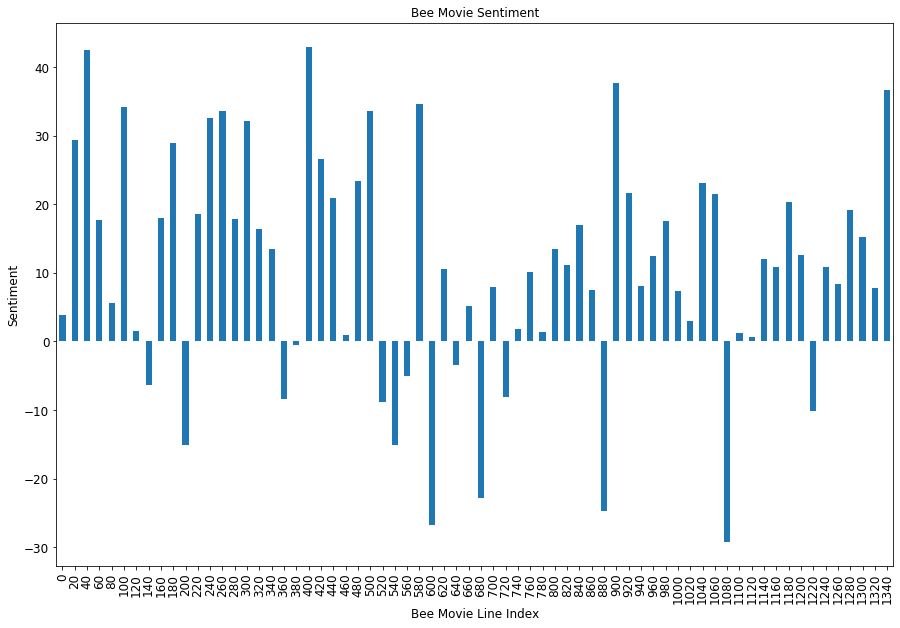

In [3]:
f = open('beeMovieScript.txt','r')
beeMovie = f.readlines()
beeMovie = [s.strip() for s in beeMovie]

#Get chunks of 20 lines and their sentiments
beeSentiments = []
i = 0
while i < 1360:
    chunk = " ".join(beeMovie[i:(i+20)])
    beeSentiments.append(TextBlob(chunk).sentiment.polarity * 100)
    i += 20

#Create dataframe
beeIndx = range(0,1359,20)
beeDf = pd.DataFrame({'beeIndx' : beeIndx, 'beeSentiment' : beeSentiments})

#Plot
ax = beeDf.plot(x = 'beeIndx', y='beeSentiment', kind='bar', title ="Bee Movie Sentiment", figsize=(15, 10), legend=False, fontsize=12)
ax.set_xlabel("Bee Movie Line Index", fontsize=12)
ax.set_ylabel("Sentiment", fontsize=12)
plt.show()


In [4]:
import nltk
import re

In [5]:
#Tokenize Sentences properly
def format_sentence(sent):
    return({word: True for word in nltk.word_tokenize(sent)})

print(format_sentence("This cat isn't very cute"))

#Simple Function to Clean Tweets
def clean_tweet(tweet):
    '''
    Utility function to clean tweet text by removing links, special characters,
    and usernames using simple regex statements.
    '''
    tweet = tweet.lower().strip()
    return ' '.join(re.sub("(@[A-Za-z0-9_]+)|([^0-9A-Za-z'\-])|(\w+:\/\/\S+)", " ", tweet).split())

{'This': True, 'cat': True, 'is': True, "n't": True, 'very': True, 'cute': True}


In [6]:
pos = []
with open(r"pos_tweets.txt", encoding="utf8") as f:
    for i in f:
        cleanedTweet = format_sentence(clean_tweet(i))
        pos.append([cleanedTweet, 'pos'])
        
neg = []
with open(r"neg_tweets.txt", encoding="utf8") as f:
    for i in f:
        cleanedTweet = format_sentence(clean_tweet(i))
        neg.append([cleanedTweet, 'neg'])  

In [7]:
neg[0]

[{'too': True,
  'busy': True,
  'to': True,
  'see': True,
  'me': True,
  'in': True,
  'london': True,
  'this': True,
  'evening': True,
  'what': True,
  'is': True,
  'a': True,
  'boy': True,
  'do': True},
 'neg']

In [8]:
# next, split labeled data into the training and test data
training = pos[:int((.8)*len(pos))] + neg[:int((.8)*len(neg))]
test = pos[int((.2)*len(pos)):] + neg[int((.2)*len(neg)):]

In [9]:
#Now time to create our model
from nltk.classify import NaiveBayesClassifier
 
classifier = NaiveBayesClassifier.train(training)
classifier.show_most_informative_features(20)

Most Informative Features
                 awesome = True              pos : neg    =     26.2 : 1.0
                headache = True              neg : pos    =     19.1 : 1.0
                      no = True              neg : pos    =     15.8 : 1.0
                    love = True              pos : neg    =     14.4 : 1.0
                   thank = True              pos : neg    =     12.7 : 1.0
                    haha = True              pos : neg    =     11.9 : 1.0
                  hahaha = True              pos : neg    =     11.2 : 1.0
                   great = True              pos : neg    =     10.2 : 1.0
                       n = True              pos : neg    =      9.7 : 1.0
               beautiful = True              pos : neg    =      9.7 : 1.0
                     fan = True              pos : neg    =      9.7 : 1.0
                   loved = True              pos : neg    =      9.7 : 1.0
                    lost = True              neg : pos    =      9.3 : 1.0

In [10]:
example1 = "Bobby is awesome!" 
print(classifier.classify(format_sentence(clean_tweet(example1))))

example2 = "Bobby is awful." 
print(classifier.classify(format_sentence(clean_tweet(example2))))

#Does not take into account negation, so likely to not be perfect
example3 = "Bobby is not awful!" 
print(classifier.classify(format_sentence(clean_tweet(example3))))

pos
neg
neg


In [11]:
from nltk.classify.util import accuracy
print(accuracy(classifier, test))

0.9351620947630923


In [12]:
test[0]

[{'for': True,
  'sure': True,
  'except': True,
  'the': True,
  'new': True,
  'moon': True,
  'bit': True,
  'imagine': True,
  'live': True,
  'in': True,
  'australia': True,
  'omj': True},
 'pos']

In [13]:
classifier.classify(test[0][0])

'pos'

In [14]:
df_full = pd.read_csv("tweets.csv")

In [15]:
df_full.head()

,id,id_str,user_location,user_bg_color,retweet_count,user_name,polarity,created,geo,user_description,user_created,user_followers,coordinates,subjectivity,text
0,1,729828033092149248,Wheeling WV,022330,0,Jaybo26003,0.00,2016-05-10T00:18:57,NaN,NaN,2011-11-17T02:45:42,39,NaN,0.0,Make a difference vote! WV Bernie Sanders Coul...
1,2,729828033092161537,NaN,C0DEED,0,brittttany_ns,0.15,2016-05-10T00:18:57,NaN,18 // PSJAN,2012-12-24T17:33:12,1175,NaN,0.1,RT @HlPHOPNEWS: T.I. says if Donald Trump wins...
2,3,729828033566224384,NaN,C0DEED,0,JeffriesLori,0.00,2016-05-10T00:18:57,NaN,NaN,2012-10-11T14:29:59,42,NaN,0.0,You have no one to blame but yourselves if Tru...
3,4,729828033893302272,global,C0DEED,0,WhorunsGOVs,0.00,2016-05-10T00:18:57,NaN,Get Latest Global Political news as they unfold,2014-02-16T07:34:24,290,NaN,0.0,'Ruin the rest of their lives': Donald Trump c...
4,5,729828034178482177,"California, USA",131516,0,BJCG0830,0.00,2016-05-10T00:18:57,NaN,Queer Latino invoking his 1st amendment privil...,2009-03-21T01:43:26,354,NaN,0.0,"RT @elianayjohnson: Per source, GOP megadonor ..."


In [16]:
df_full.text[0]

'Make a difference vote! WV Bernie Sanders Could Go 8 Of Next 9 Primaries. https://t.co/Tk5btARUId #StillSanders #DropOutHillary #WVPrimary'

In [17]:
def get_candidate(row):
    candidates = []
    text = row["text"].lower()
    if "clinton" in text or "hillary" in text:
        candidates.append("clinton")
    if "trump" in text or "donald" in text:
        candidates.append("trump")
    if "sanders" in text or "bernie" in text:
        candidates.append("sanders")
    return ",".join(candidates)
df_full["candidate"] = df_full.apply(get_candidate,axis=1)

#df = df_full[df_full.candidate == "trump"] #may 2016
df_full = df_full[df_full.text.str.startswith("RT ")==False].reset_index(drop=True) #filter RTs for the most part

In [18]:
df_full.head()

,id,id_str,user_location,user_bg_color,retweet_count,user_name,polarity,created,geo,user_description,user_created,user_followers,coordinates,subjectivity,text,candidate
0,1,729828033092149248,Wheeling WV,022330,0,Jaybo26003,0.0,2016-05-10T00:18:57,NaN,NaN,2011-11-17T02:45:42,39,NaN,0.0,Make a difference vote! WV Bernie Sanders Coul...,"clinton,sanders"
1,3,729828033566224384,NaN,C0DEED,0,JeffriesLori,0.0,2016-05-10T00:18:57,NaN,NaN,2012-10-11T14:29:59,42,NaN,0.0,You have no one to blame but yourselves if Tru...,trump
2,4,729828033893302272,global,C0DEED,0,WhorunsGOVs,0.0,2016-05-10T00:18:57,NaN,Get Latest Global Political news as they unfold,2014-02-16T07:34:24,290,NaN,0.0,'Ruin the rest of their lives': Donald Trump c...,trump
3,11,729828033939525633,NaN,F5F8FA,0,UghToHillary,0.0,2016-05-10T00:18:57,NaN,NaN,2016-03-20T02:31:39,1351,NaN,0.0,https://t.co/tXn3QV1KNC,
4,14,729828034841333765,"Isla Mujeres, Quintana Roo",000000,0,Cata_l1n,0.0,2016-05-10T00:18:57,NaN,El éxito tiene una simple fórmula: da lo mejor...,2014-02-28T05:15:18,153,NaN,0.0,Trump se retracta tras comentarios sobre aumen...,trump


In [20]:
df_full.text[2]

"'Ruin the rest of their lives': Donald Trump calls for arrests after wave of protests at rally https://t.co/Aytod0rdHG #howto"

In [22]:
sentiments = []
for tweetText in df_full.text:
    cleanedTweet = format_sentence(clean_tweet(tweetText))
    sentiments.append(classifier.classify(cleanedTweet))

In [23]:
df_full["Sentiments"] = sentiments

print(len(df_full[df_full.Sentiments == 'pos']))
print(len(df_full[df_full.Sentiments == 'neg']))


37450
62109


In [29]:
df_full.groupby(["candidate", "Sentiments"]).id.count()

candidate              Sentiments
                       neg            9054
                       pos            3555
clinton                neg            6574
                       pos            3473
clinton,sanders        neg            1597
                       pos            1003
clinton,trump          neg            5382
                       pos            3478
clinton,trump,sanders  neg             758
                       pos             625
sanders                neg            5748
                       pos            4250
trump                  neg           32123
                       pos           20385
trump,sanders          neg             873
                       pos             681
Name: id, dtype: int64

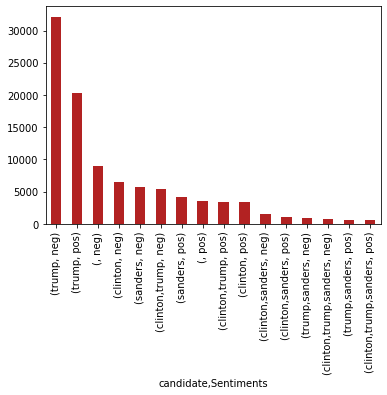

In [40]:
df_full.groupby(["candidate", "Sentiments"]).id.count().sort_values(ascending=False).plot(kind="bar", color="firebrick")

In [30]:
#Print some tweets
for niceTweet in df_full[df_full.Sentiments == 'pos']["text"][0:5]:
    print(niceTweet)
    print("")


for sadTweet in df_full[df_full.Sentiments == 'neg']["text"][0:5]:
    print(sadTweet)
    print("")

Make a difference vote! WV Bernie Sanders Could Go 8 Of Next 9 Primaries. https://t.co/Tk5btARUId #StillSanders #DropOutHillary #WVPrimary

'Ruin the rest of their lives': Donald Trump calls for arrests after wave of protests at rally https://t.co/Aytod0rdHG #howto

Trump se retracta tras comentarios sobre aumento de impuestos a ricos en EU https://t.co/48nLJaJHFB

Our media represents what the 1% allow on the air and they refuse to give Bernie any real airtime. https://t.co/jQuEwCcAa2

Ann Coulter writes book in praise of Donald Trump https://t.co/ZLDh88U3eY

You have no one to blame but yourselves if Trump the nominee. He's already said he doesn't need me.
So buh-bye.  https://t.co/hM1TjOtVrd

https://t.co/tXn3QV1KNC

Sad thing is most people are to stupid to know how the economy works. If they did they would run away fast from DT https://t.co/W4WsZbPpLj

Need to read up about Filipino politics. Apparently a Trump-like candidate #Duterte won the election in the Philippines.

She's su

In [31]:
sentimentsTB = []
for tweetText in df_full.text:
    cleanedTweet = clean_tweet(tweetText)
    sentiment = TextBlob(cleanedTweet).sentiment.polarity
    if sentiment > 0:
        sentimentsTB.append("pos")
    elif sentiment < 0:
        sentimentsTB.append("neg")
    elif sentiment == 0:
        sentimentsTB.append("neu")

In [32]:
df_full["Sentiments_TB"] = sentimentsTB

print(len(df_full[df_full.Sentiments_TB == 'pos']))
print(len(df_full[df_full.Sentiments_TB == 'neg']))
print(len(df_full[df_full.Sentiments_TB == 'neu']))

31926
17281
50352


In [33]:
df_full.groupby(["candidate", "Sentiments_TB"]).id.count()

candidate              Sentiments_TB
                       neg               1881
                       neu               7166
                       pos               3562
clinton                neg               1871
                       neu               4904
                       pos               3272
clinton,sanders        neg                355
                       neu               1255
                       pos                990
clinton,trump          neg               1983
                       neu               4161
                       pos               2716
clinton,trump,sanders  neg                233
                       neu                670
                       pos                480
sanders                neg               1360
                       neu               5032
                       pos               3606
trump                  neg               9366
                       neu              26493
                       pos              166

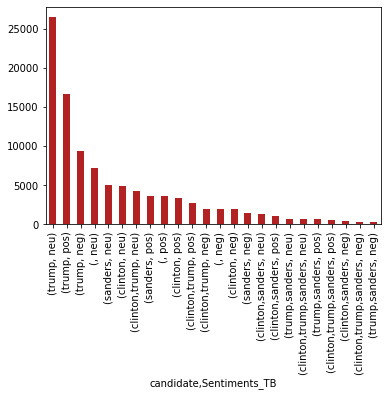

In [41]:
df_full.groupby(["candidate", "Sentiments_TB"]).id.count().sort_values(ascending=False).plot(kind="bar", color="firebrick")

In [36]:
for niceTweet in df_full[df_full.Sentiments_TB == 'pos']["text"][0:5]:
    print(niceTweet)
    print("")


for sadTweet in df_full[df_full.Sentiments_TB == 'neg']["text"][0:5]:
    print(sadTweet)
    print("")
    

Need to read up about Filipino politics. Apparently a Trump-like candidate #Duterte won the election in the Philippines.

Our media represents what the 1% allow on the air and they refuse to give Bernie any real airtime. https://t.co/jQuEwCcAa2

@marklevinshow @KatrinaPierson @realDonaldTrump Trump has more primary votes than Romney received in all of 2012http://usat.ly/26ulc3k

HOT TOYS 1/6 MARVEL AVENGERS MMS172 HAWKEYE CLINTON BARTON ACTION FIGURE US - Bid Now! Onl… https://t.co/HkTli2Wszi https://t.co/7fhn5ca2xV

@FoxNews @krauthammer krauthammer lost pretty much all my respect I'm not the only one he's a clown after his Trump nonsense

Sad thing is most people are to stupid to know how the economy works. If they did they would run away fast from DT https://t.co/W4WsZbPpLj

She's such a little person she could never apologize for anything. https://t.co/mGGwrBmYZn

hey Chris, remember your JOB, here in NJ ??- - shit for brains Christie - bet on Trump pays off (from @AP) https://t.co